Import some prerequisites

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [2]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [3]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.

    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.

    Returns:
        (tuple): tuple of two point of line.
    '''

    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# part b


Implement this function to detect and remove circles in the given image.

In [15]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here

    #  to the gray scale
    GrayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detecting circles with hough
    DetectedCircles = cv2.HoughCircles(GrayScaleImage, cv2.HOUGH_GRADIENT, 1, 20, param1=45, param2=40, minRadius=0, maxRadius=0)

    if DetectedCircles is not None:
       # Converting circles to the integer coordinates
        DetectedCircles = np.round(DetectedCircles[0, :]).astype("int")
        for (x, y, r) in DetectedCircles:
            cv2.circle(out_img, (x, y), r + 2, (0, 0, 0), -1)

    return out_img

Test your implementation (dont change this cell)

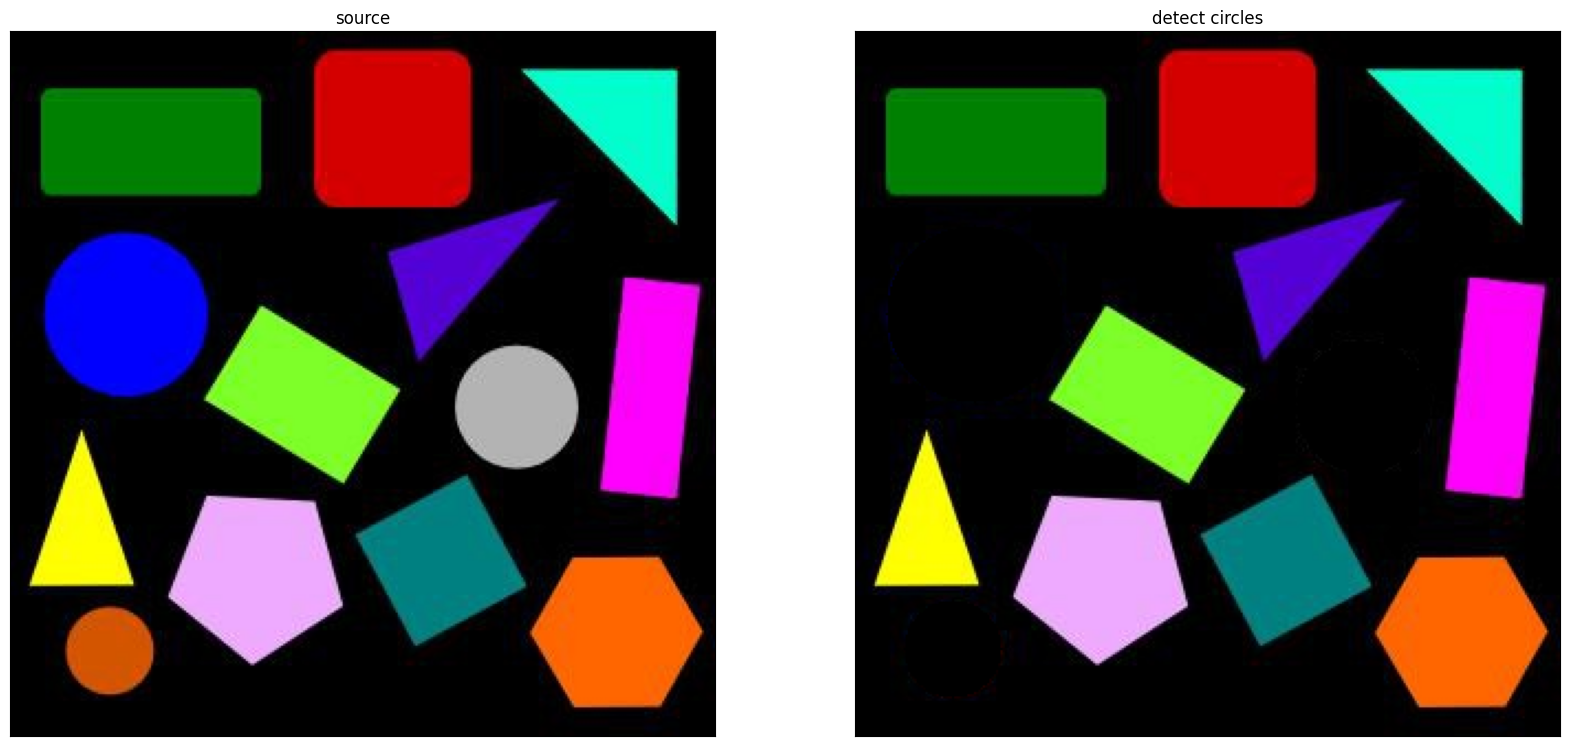

In [18]:
image_list = []

image = cv2.imread(os.path.join('1.jpg'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

In [19]:
cv2.imwrite('output_image_partb.png', out_img)

True

# part c

Implement this function to detect lines in the given image with hough algorithm.

In [23]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here

    GrayScaleImage = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)
    GrayScaleImage = cv2.GaussianBlur(GrayScaleImage,(3,3),1)

    Edges = cv2.Canny(GrayScaleImage,20,100)

    ImageLines=np.array([])
    ImageLines = cv2.HoughLinesP(Edges, 0.1, np.pi / 180, 1, ImageLines)
    lineColor=(255,255,255)
    for line in ImageLines:
        for x1,y1,x2,y2 in line:
           # Illustrating using white lines
            cv2.line(out_img,(x1,y1),(x2,y2),lineColor,2)
    return out_img

Test your implementation (dont change this cell)

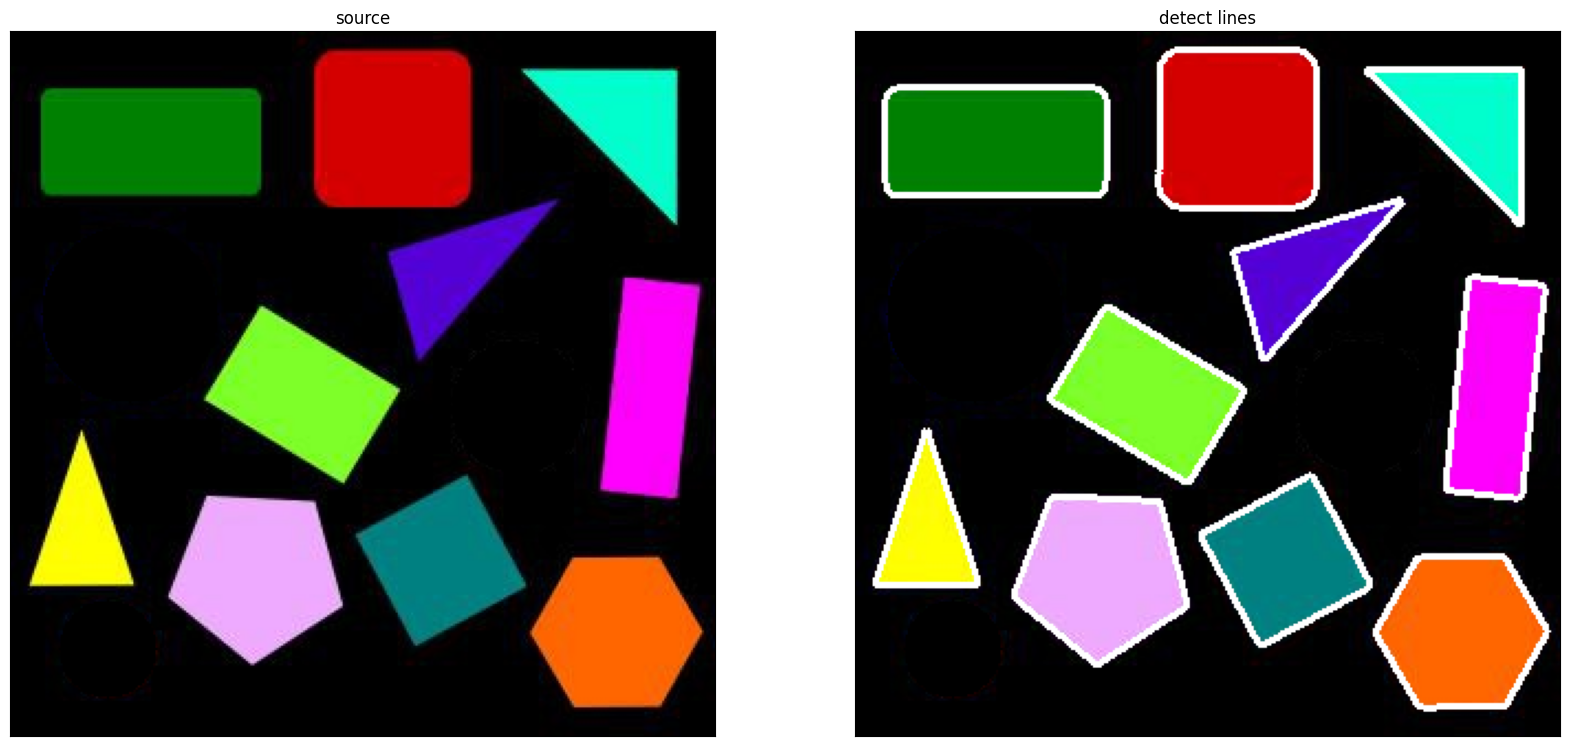

True

In [24]:
image_list = []

image = cv2.imread(os.path.join('output_image_partb.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q7c')
cv2.imwrite('q7c.png', out_img)

# extra part c

In [9]:
def detect_lines_hough(image):
    out_img = image.copy()
    GrayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # https://docs.opencv.org/4.x/d3/de6/tutorial_js_houghlines.html
    BlurredImage = cv2.GaussianBlur(GrayScaleImage, (5, 5), 1)
    # Edge detection using Canny
    Edges = cv2.Canny(BlurredImage, 50, 150)
    DetectedLines = cv2.HoughLines(Edges, 1, np.pi / 180, 53) # Using hough to detect lines
    if DetectedLines is not None:
        for rho, theta in DetectedLines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 200 * (-b))
            y1 = int(y0 + 200 * (a))
            x2 = int(x0 - 200 * (-b))
            y2 = int(y0 - 200 * (a))
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return out_img

In [27]:
def detect_and_draw_lines(image):
    out_img = image.copy()

    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply GaussianBlur to reduce noise and improve edge detection
    gray_blurred = cv2.GaussianBlur(gray, (5, 5), 1)

    # Apply Canny edge detection
    edges = cv2.Canny(gray_blurred, 50, 150, apertureSize=3)

    # Detect lines using HoughLines
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 53)

    # Draw the lines on the image
    if lines is not None:
        for line in lines:
            rho, theta = line[0]
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)

    return out_img


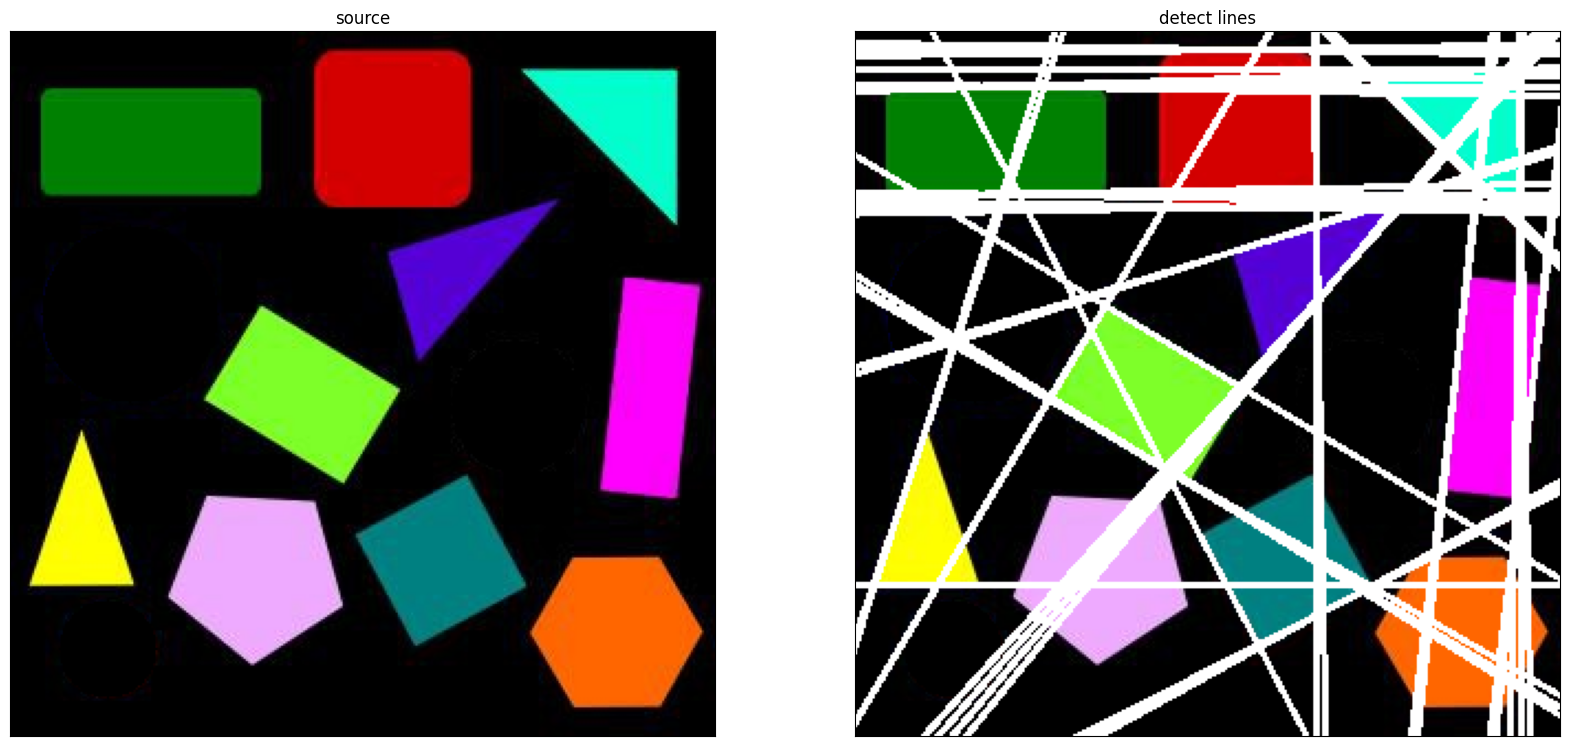

In [28]:
image_list = []
image = cv2.imread(os.path.join('output_image_partb.png'))
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = detect_and_draw_lines(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q7c-extra')

# part d

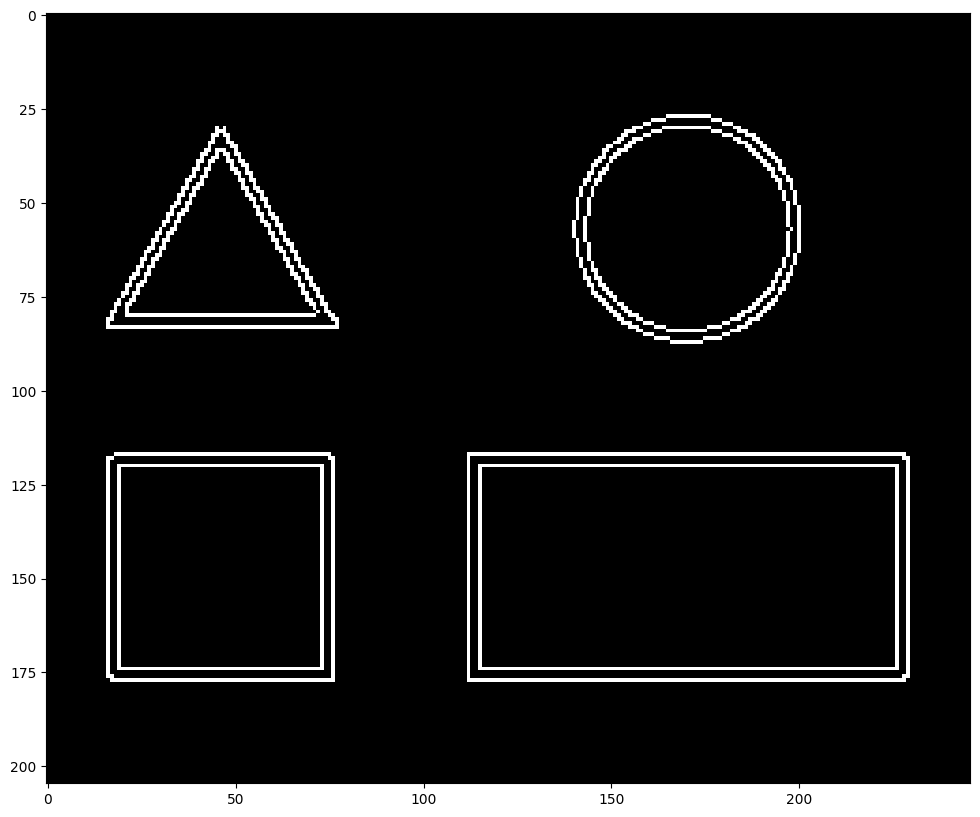

In [29]:
image7 = cv2.imread("7.jpg", cv2.IMREAD_GRAYSCALE)
# Using canny for edge detecting
image7_Edges = cv2.Canny(image7, 50, 150)
plt.imshow(image7_Edges, cmap="gray")
plt.show()

In [30]:
contours, hierarchy = cv2.findContours(image7_Edges//255, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
def draw_contour(img, contours):
    Approximates = []
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 0.03 * cv2.arcLength(contour, True), True)
        Approximates.append(approx)
        cv2.drawContours(img, [approx], 0, (255, 0, 0), 2)
    return img, Approximates

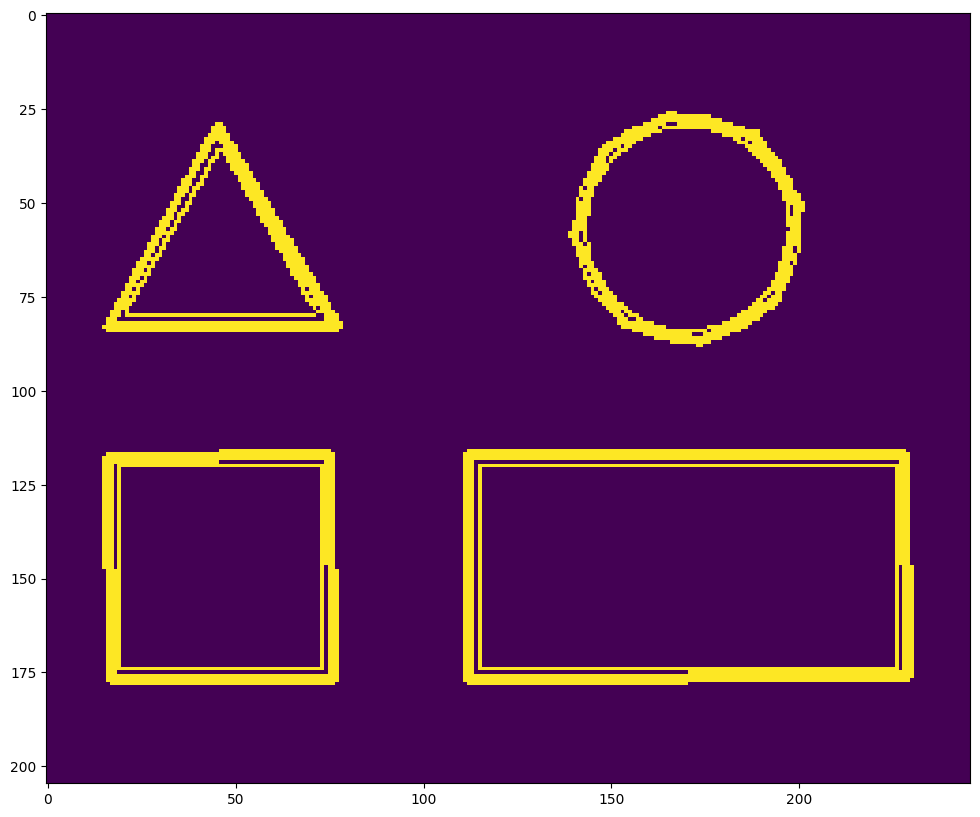

In [31]:
out_image, Approximates = draw_contour(image7_Edges, contours)
plt.imshow(out_image)

In [35]:
def classify_shapes(approximates):
    output = []
    for appx in approximates:
        vertexNum = len(appx)
        if vertexNum == 3:
            shape = "Triangle"
        elif vertexNum == 4:
            x, y, w, h = cv2.boundingRect(appx)
            if float(w)/h >= 0.95 and float(w)/h <= 1.05:
                shape = "Square"
            else:
                shape = "Rectangle"
        else:
            shape = "Circle"
        x,y,w,h = cv2.boundingRect(appx)
        output.append((x,y,shape))
    return output

In [36]:
from google.colab.patches import cv2_imshow

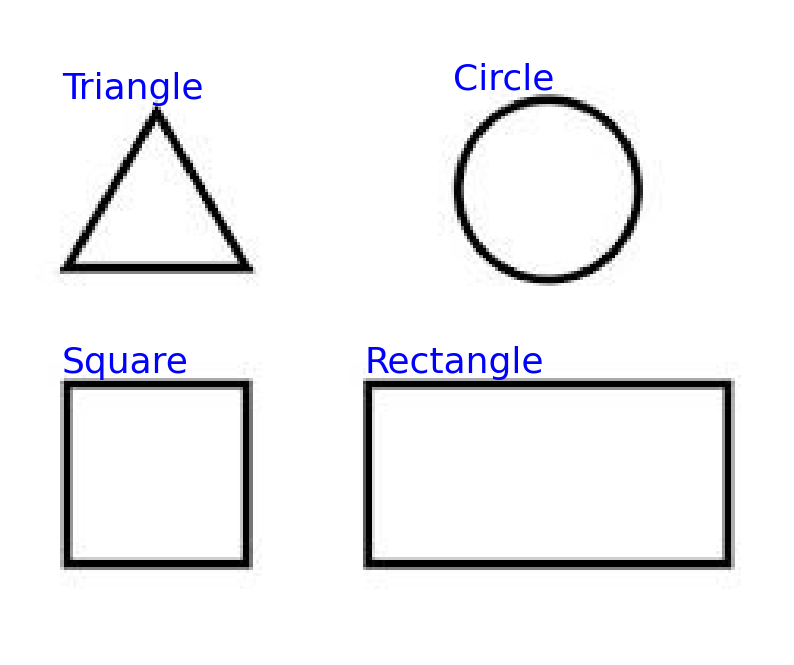

In [50]:
result = classify_shapes(Approximates)
plt.figure(figsize=(10, 10))
plt.imshow(image7, cmap='gray')

for item in result:
    x, y, shape = item[0], item[1], item[2]
    plt.text(x, y, shape, fontsize=26, color='blue', ha='left', va='bottom')

plt.axis('off')
plt.show()